In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Generating all possible set of n*n spin configuration and save it into {out} parameter
# O(2^{n*n})

def generator(out,i,j,inp,n=5):
    if(j >= n) :
        j = 0
        i += 1
    if(i >= n) :
        inp0 = np.copy(inp)
        out.append(inp0)
        return 
    generator(out,i,j+1,inp,n)
    inp[i,j] *= -1
    generator(out,i,j+1,inp,n)
    inp[i,j] *= -1

In [69]:
# without J coefficient

def naive_calc_H(spin_conf):
    res = 0
    N = len(spin_conf[0])
    for i in range(N):
        for j in range(N-1):
            res += spin_conf[i][j]*spin_conf[i][j+1]
        if(i == 0) : continue
        for j in range(N):
            if(j==0) :
                res += spin_conf[i][j]*(spin_conf[i-1][j] + spin_conf[i-1][j+1])
            elif(j==N-1) :
                res += spin_conf[i][j]*(spin_conf[i-1][j] + spin_conf[i-1][j-1])
            else :
                res += spin_conf[i][j]*(spin_conf[i-1][j] + spin_conf[i-1][j-1] + spin_conf[i-1][j+1])
    return res*-1

In [70]:
# without J coefficient

def naive_calc_H2(sc): #spin configuration array
    res = 0
    N = len(sc[0])
    for i in range(N):
        for j in range(N):
            sum = 0
            sum += sc[i-1][j] + sc[i][j-1] + sc[(i+1)%N][j] + sc[i][(j+1)%N]
            res += sc[i][j]*sum
    return res*-1

In [71]:
# without J coefficient

def naive_calc_H3(sc): #spin configuration array
    res = 0
    N = len(sc[0])
    for i in range(N*N):
        nn = i + 1
        if(nn >= N*N) : nn -= N*N
        sum = sc[nn%N][int(nn/N)]

        nn = i - 1
        if(nn < 0) : nn += N*N
        sum += sc[nn%N][int(nn/N)]
        # print(nn%N,int(nn/N))
        
        nn = i + N
        if(nn >= N*N) : nn -= N*N
        sum += sc[nn%N][int(nn/N)]

        nn = i - N
        if(nn < 0) : nn += N*N
        sum += sc[nn%N][int(nn/N)]
        
        # print(sum, i)
        res += sum*sc[i%N][int(i/N)]
    # print(sc)
    # print()

    return res*-1

In [72]:
# Assume that J/k = 1 for this case

def partition_function(H,T,J=1):
    # k = 1.38E-23 # boltzman constant
    k = 1
    return np.exp(-1*J*H/(k*T))

In [73]:
# Generating all possible set of n*n spin configuration and save it into {out} parameter
# O(2^{n*n})
# Up/down symmetry를 위해서 첫 항을 1로 고정
# result 2**(n*n-1)개의 element를 가진 list

def generator_sym(out,inp,n=5,i=0,j=1):
    if(j >= n) :
        j = 0
        i += 1
    if(i >= n) :
        inp0 = np.copy(inp)
        out.append(inp0)
        # Hout.append(naive_calc_H(inp0))
        return 
    # generator_sym(out,Hout,inp,n,i,j+1)
    generator_sym(out,inp,n,i,j+1)
    inp[i,j] *= -1
    # generator_sym(out,Hout,inp,n,i,j+1)
    generator_sym(out,inp,n,i,j+1)
    inp[i,j] *= -1

# N*N Lattice configuration generator -> Easy to use

def genNN(N):
    res = []
    Hres = []
    # generator_sym(res,Hres,np.ones((N,N),dtype=np.int0),N)
    generator_sym(res,np.ones((N,N),dtype=np.int0),N)
    # return np.array(res), np.array(Hres)
    return np.array(res) 

def gen_sum_si(inp):
    return np.sum(np.sum(inp,axis=2),axis=1)

In [74]:
L22 = genNN(2)
print(len(L22),2**4,2**4)
# print(L55)

8 16 16


In [75]:
HL22 = []
for i in L22:
    HL22.append(naive_calc_H3(i))
HL22 = np.array(HL22)

In [85]:
HL22

array([-16,   0,   0,   0,   0,   8,   8,   0], dtype=int64)

In [77]:
L22

array([[[ 1,  1],
        [ 1,  1]],

       [[ 1,  1],
        [ 1, -1]],

       [[ 1,  1],
        [-1,  1]],

       [[ 1,  1],
        [-1, -1]],

       [[ 1, -1],
        [ 1,  1]],

       [[ 1, -1],
        [ 1, -1]],

       [[ 1, -1],
        [-1,  1]],

       [[ 1, -1],
        [-1, -1]]], dtype=int64)

In [78]:
ls = []
for i in range(25):
    T = 0.2*(i+1)
    ZL22 = partition_function(HL22,T)
    # print(ZL22)
    ls.append(np.sum(gen_sum_si(L22) * ZL22)/np.sum(ZL22))

In [91]:
gen_sum_si(L22)

array([ 4,  2,  2,  0,  2,  0,  0, -2], dtype=int64)

In [96]:
ls = []
for i in range(25):
    T = 0.2*(i+1)
    ZL22 = partition_function(HL22,T)
    # print(ZL22)
    print(np.sum(gen_sum_si(L22) * ZL22))

2.216248953757404e+35
9.4154106734808e+17
1524916892511.5383
1940660785.639161
35544446.08203149
2469754.507648526
367646.3206316173
88109.86317922687
29007.83234336424
11927.831948166913
5765.89466124679
3147.0879769096673
1886.0944690235012
1216.6703107301955
832.508995559338
597.6526364103064
446.3833058435298
344.6102308702088
273.567999805362
222.39260013257694
184.51577510247867
155.814289989405
133.61327778111578
116.1264995781045
102.13012078843741


In [97]:
ZL22 = partition_function(HL22,0.4)
print(np.sum(ZL22))
print(np.sum(gen_sum_si(L22) * ZL22))
print(np.sum(gen_sum_si(L22) * ZL22)/np.sum(ZL22))

print(gen_sum_si(L22) * ZL22)


2.3538526683702e+17
9.4154106734808e+17
4.0
[ 9.41541067e+17  2.00000000e+00  2.00000000e+00  0.00000000e+00
  2.00000000e+00  0.00000000e+00  0.00000000e+00 -2.00000000e+00]


In [98]:
T = [(i+1)*(0.2) for i in range(25)]
y = ls/max(ls)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

ValueError: max() arg is an empty sequence

----

In [80]:
L55 = genNN(5)
print(len(L55),2**24,2**25)
# print(L55)
# about 70s

16777216 16777216 33554432


In [81]:
HL55 = []
for i in L55:
    HL55.append(naive_calc_H3(i))
HL55 = np.array(HL55)

In [82]:
mL55 = []
_N = 50
for i in range(_N):
    T = (5/_N)*(i+2)
    ZL55 = partition_function(HL55,T)
    # print(ZL22)
    mL55.append(np.sum(gen_sum_si(L55) * ZL55)/np.sum(ZL55))

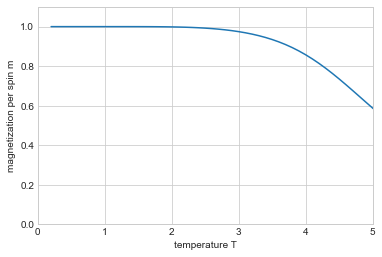

In [83]:
T = [(i+2)*(5/_N) for i in range(_N)]
y = mL55/max(mL55)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

plt.ylabel('magnetization per spin m')
plt.xlabel('temperature T')
plt.show()